## **The start of analysis with all empty values removed**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sys
# suppress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

try:
    dataCo2 = pd.read_csv('CO2.csv')
    dataCo2= pd.DataFrame(dataCo2)
except:
    FileNotFoundError 
    print("data can´t be found")

print(dataCo2) # to see the basic structure of the data


           Country ISO 3166-1 alpha-3  UN M49  Year         Total  \
0      Afghanistan                AFG       4  1750           NaN   
1      Afghanistan                AFG       4  1751           NaN   
2      Afghanistan                AFG       4  1752           NaN   
3      Afghanistan                AFG       4  1753           NaN   
4      Afghanistan                AFG       4  1754           NaN   
...            ...                ...     ...   ...           ...   
61420       Global                WLD     756  2018  36766.912297   
61421       Global                WLD     756  2019  37039.881946   
61422       Global                WLD     756  2020  35007.822458   
61423       Global                WLD     756  2021  36815.680623   
61424       Global                WLD     756  2022  37150.949699   

               Coal           Oil          Gas       Cement     Flaring  \
0               NaN           NaN          NaN     0.000000         NaN   
1               NaN  

In [2]:
# Rename coulmn names to be more readable
dataCo2=dataCo2.rename({"ISO 3166-1 alpha-3": "ISO Code", "Total":"Total Co2 Emission (Mt)", "Per Capita":"Per Capita (t)"},axis=1)

dataCo2 = dataCo2.drop(["UN M49"], axis=1) # This is recommended by the author as the column is not yet reliable.

drop_global= dataCo2[(dataCo2["Country"]=="Global")].index 

print(dataCo2.columns,"\n")

Index(['Country', 'ISO Code', 'Year', 'Total Co2 Emission (Mt)', 'Coal', 'Oil',
       'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita (t)'],
      dtype='object') 



In [3]:
print("number of nan values per column\n",dataCo2.isna().sum()) # check for nan values.

number of nan values per column
 Country                        0
ISO Code                    1092
Year                           0
Total Co2 Emission (Mt)    38253
Coal                       38470
Oil                        39655
Gas                        39683
Cement                     37884
Flaring                    39774
Other                      59612
Per Capita (t)             43882
dtype: int64


### **Removed the "Other" column since it´s very incomplete overall and would affect the result to much**
- 15181 rows x 10 columns with removing it
- 1813 rows x 11 columns by not removing it
- This leads to a lesser degree of dataloss

By removing "Global" to get rid of duplicate values we have 15108 rows left

In [4]:
dataCo2= dataCo2.drop(["Other"], axis=1) 
temp_data= dataCo2
# these are for the mean, median and std. We don´t want duplicates there.
no_global = dataCo2
no_global= no_global.drop(drop_global)
no_global= no_global.dropna()

dataCo2=dataCo2.dropna()
print("number of nan values per column\n",dataCo2.isna().sum()) # Double-check for nan values.

number of nan values per column
 Country                    0
ISO Code                   0
Year                       0
Total Co2 Emission (Mt)    0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Per Capita (t)             0
dtype: int64


In [5]:
print(dataCo2)

           Country ISO Code  Year  Total Co2 Emission (Mt)          Coal  \
200    Afghanistan      AFG  1950                 0.084272      0.021068   
201    Afghanistan      AFG  1951                 0.091600      0.025648   
202    Afghanistan      AFG  1952                 0.091600      0.031708   
203    Afghanistan      AFG  1953                 0.106256      0.037949   
204    Afghanistan      AFG  1954                 0.106256      0.042502   
...            ...      ...   ...                      ...           ...   
61420       Global      WLD  2018             36766.912297  14725.249126   
61421       Global      WLD  2019             37039.881946  14684.277641   
61422       Global      WLD  2020             35007.822458  14225.918061   
61423       Global      WLD  2021             36815.680623  14982.537322   
61424       Global      WLD  2022             37150.949699  15222.908123   

                Oil          Gas       Cement     Flaring  Per Capita (t)  
200        

In [6]:
print(no_global)

                      Country ISO Code  Year  Total Co2 Emission (Mt)  \
200               Afghanistan      AFG  1950                 0.084272   
201               Afghanistan      AFG  1951                 0.091600   
202               Afghanistan      AFG  1952                 0.091600   
203               Afghanistan      AFG  1953                 0.106256   
204               Afghanistan      AFG  1954                 0.106256   
...                       ...      ...   ...                      ...   
61147  International Aviation      XIA  2018               614.629246   
61148  International Aviation      XIA  2019               628.507482   
61149  International Aviation      XIA  2020               268.338935   
61150  International Aviation      XIA  2021               291.446123   
61151  International Aviation      XIA  2022               424.853708   

           Coal         Oil  Gas  Cement  Flaring  Per Capita (t)  
200    0.021068    0.063204  0.0     0.0      0.0      

In [7]:
print(no_global.drop(columns=['Year']).mean())

Total Co2 Emission (Mt)    110.679664
Coal                        48.208086
Oil                         40.148368
Gas                         17.302357
Cement                       3.078931
Flaring                      1.280564
Per Capita (t)               5.183329
dtype: float64


In [8]:
print(no_global.drop(columns=['Year']).median()) 

Total Co2 Emission (Mt)    6.054263
Coal                       0.102592
Oil                        2.742032
Gas                        0.000000
Cement                     0.158660
Flaring                    0.000000
Per Capita (t)             1.802372
dtype: float64


In [9]:
print(no_global.drop(columns=['Year']).mode(numeric_only=True)) 

   Total Co2 Emission (Mt)  Coal  Oil  Gas  Cement  Flaring  Per Capita (t)
0                 0.010992   0.0  0.0  0.0     0.0      0.0             0.0


In [10]:
print(no_global.drop(columns=['Year']).std()) #Standard deviation

Total Co2 Emission (Mt)    518.580920
Coal                       298.399523
Oil                        169.031330
Gas                         90.867229
Cement                      25.995129
Flaring                      5.316414
Per Capita (t)              18.391552
dtype: float64


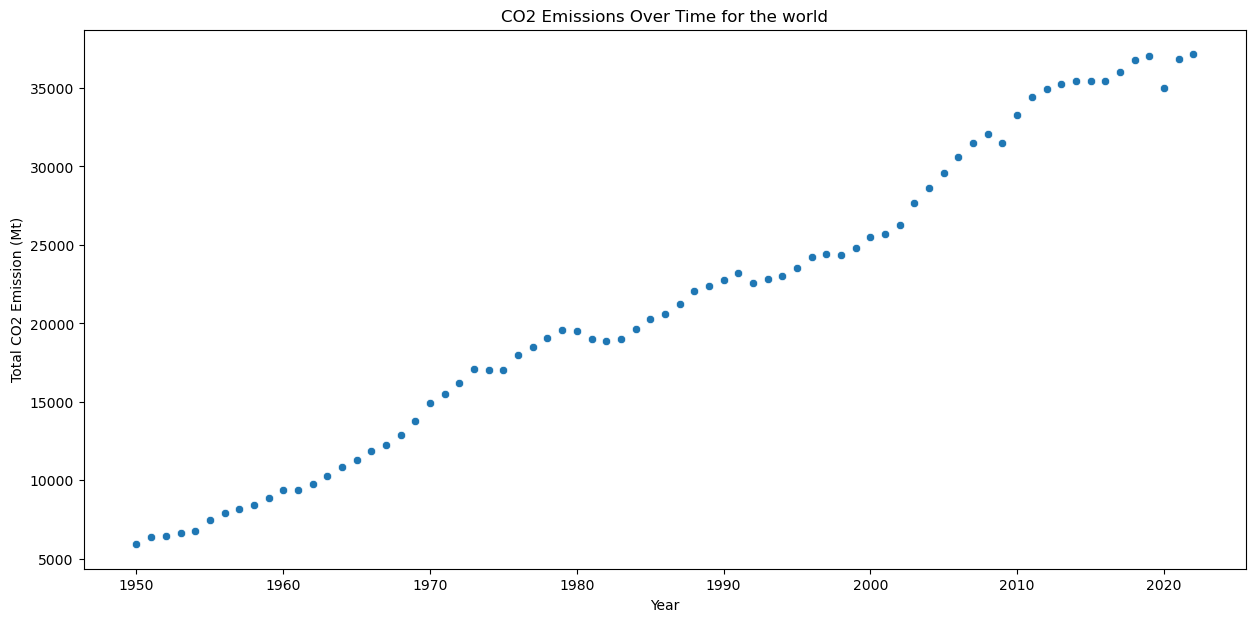

In [11]:
country_name = "Global" # Change this line to whatever Country interests you
country_data = dataCo2[dataCo2['Country'] == country_name]

# Filter the data for the time period you're interested in (e.g., after 1900)
filtered_data = country_data[country_data['Year'] >= 1900]

# Plot CO2 emissions over time for the selected country and time period
plt.figure(figsize=(15, 7))
sbn.scatterplot(x=filtered_data['Year'], y=filtered_data['Total Co2 Emission (Mt)'])
plt.title('CO2 Emissions Over Time for the world')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (Mt)')
plt.show()

In [12]:
# The reason for temp_data here is since we drop the nan values early on which means that when we try to remove "global" based on it´s index it no longer lines up.
# So we make a copy of the dataset and remove global and then the nan values instead.
temp_data = temp_data.drop(drop_global) 
temp_data= temp_data.dropna()
baseline = temp_data[(temp_data['Year'] >=1900)]
filtered_data = temp_data[(temp_data['Year'] >=1914) & (temp_data['Year'] <=1918)]
filtered_data2 = temp_data[(temp_data['Year'] >=1939) & (temp_data['Year'] <=1945)]

# remove year since it´s pointless and to make the output more readable
dataCo2_mean = temp_data.drop(columns=['Year']).mean()
baseline_mean = baseline.drop(columns=['Year']).mean()
filtered_data_mean = filtered_data.drop(columns=['Year']).mean()
filtered_data2_mean = filtered_data2.drop(columns=['Year']).mean()

# Concatenating the means horizontally
side_by_side = pd.concat([dataCo2_mean, baseline_mean, filtered_data_mean, filtered_data2_mean], axis=1)
side_by_side.columns = ['full dataset', '1900 & forward', 'World war 1', 'World war 2']  

# Printing the concatenated DataFrame
print(side_by_side)

                         full dataset  1900 & forward  World war 1  \
Total Co2 Emission (Mt)    110.679664      111.000440   389.077135   
Coal                        48.208086       47.991222   345.865833   
Oil                         40.148368       40.490869    34.038939   
Gas                         17.302357       17.451552     8.533090   
Cement                       3.078931        3.107106     0.037805   
Flaring                      1.280564        1.292282     0.000000   
Per Capita (t)               5.183329        5.212239     5.008730   

                         World war 2  
Total Co2 Emission (Mt)   164.128330  
Coal                      127.428440  
Oil                        28.252799  
Gas                         7.093878  
Cement                      1.182686  
Flaring                     0.000000  
Per Capita (t)              3.211854  


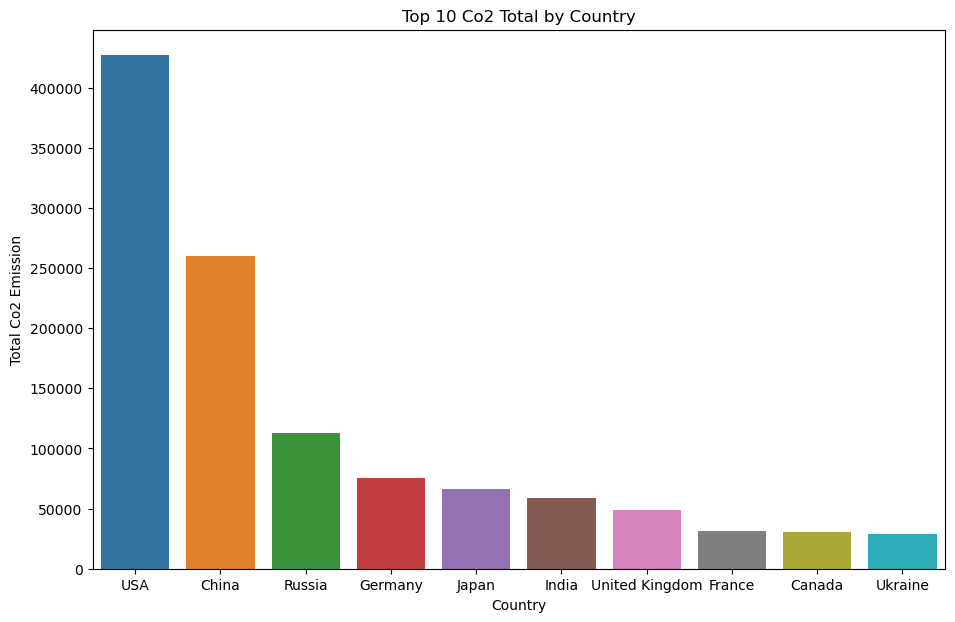

In [13]:
drop_global= dataCo2[(dataCo2["Country"]=="Global")].index 
top_10 = dataCo2.drop(drop_global,inplace=True) # remove global since we want to examine countries and not the world as a whole
top_10 = dataCo2.groupby('Country')['Total Co2 Emission (Mt)'].sum().nlargest(10).reset_index() # Add the total emission per country and select the ten highest values

plt.figure(figsize=(11, 7))
sbn.barplot(data=top_10, x='Country', y='Total Co2 Emission (Mt)')
plt.xlabel('Country')
plt.ylabel('Total Co2 Emission')
plt.title('Top 10 Co2 Total by Country')

plt.show()

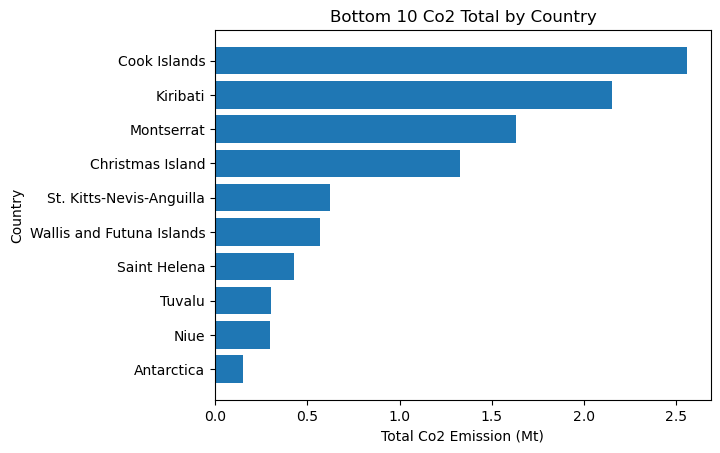

In [14]:
buttom_10 = dataCo2.groupby('Country')['Total Co2 Emission (Mt)'].sum().nsmallest(10).reset_index() # Add the total emission per country and select the ten lowest values
# The names were to long so I made the plot horizontal instead here.
plt.barh(y=buttom_10["Country"],width=buttom_10['Total Co2 Emission (Mt)'])
plt.xlabel('Total Co2 Emission (Mt)')
plt.ylabel('Country')
plt.title('Bottom 10 Co2 Total by Country')

plt.show()